In [1]:
# synthetic classification dataset
import numpy as np
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

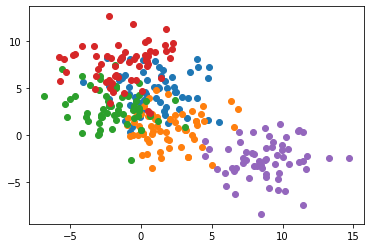

In [2]:
from sklearn.datasets import make_blobs
center = 5
X, y_true = make_blobs(n_samples=300, centers=center,
                       cluster_std=2, random_state=0)
for class_value in range(center):
    # get row indexes for samples with this class
    row_ix = np.where(y_true == class_value)
    # create scatter of these samples
    plt.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
plt.show()

In [3]:
#test
print(X.shape)
print(y_true.shape)
print(X[0:10])
print(y_true[0:10])

(200, 2)
(200,)
[[ 2.26403424  1.82613379]
 [-0.97647444  2.59138889]
 [ 1.10046838  4.02254067]
 [-2.82715074  7.11970523]
 [ 1.53393915  0.31915668]
 [ 0.98362009  5.55389667]
 [-1.74452433  2.98606238]
 [ 0.35482006  2.9172298 ]
 [ 1.83747356  5.14545322]
 [ 1.48663347  4.39407536]]
[1 2 0 3 1 0 2 0 0 0]


In [3]:
## Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_true, test_size=0.33, random_state=42)

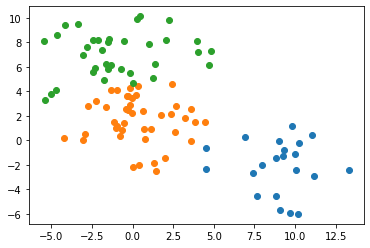

In [12]:
## KMeans with fix cluster
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)
model.fit(X_train)
yhat = model.predict(X_test)
clusters = np.unique(y_test)
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(yhat == cluster)
    # create scatter of these samples
    plt.scatter(X_test[row_ix, 0], X_test[row_ix, 1])
# show the plot
plt.show()

In [5]:
## Calculating distances
distance = model.transform(X)
print(yhat[0:10])
print(distance.shape)
print(distance[0:10, 0:10])
print(np.min(distance[0]))

[2 3 1 0 2 1 3 1 1 1]
(200, 4)
[[6.90617168 2.8575513  0.86024956 4.11583324]
 [5.125251   2.5186968  3.4472366  0.79661572]
 [4.42907419 0.37858288 3.18803884 3.01913056]
 [1.57367657 4.63270955 7.8509757  4.35588132]
 [7.93153242 4.05227792 0.85928291 4.14905845]
 [3.1828347  1.2450265  4.6954207  3.77144945]
 [4.73105808 2.92405561 4.3107265  0.08465947]
 [5.08439857 1.48630192 2.585272   2.0612229 ]
 [4.09779871 1.28254356 4.16522103 4.18976131]
 [4.36739089 0.63151721 3.45745424 3.52086269]]
0.8602495604456192


In [5]:
## Measuring the cluster distance for original data
import math
W = []
for k in range(1,10):
    model = KMeans(n_clusters=k)
    model.fit(X_train)
    yhat = model.predict(X_test)
    distance = model.transform(X_test)
    d = 0
    for j in range(0,len(yhat)):
        min_distance = np.min(distance[j])
        d = d + min_distance
    W.append(math.log(d))
print(len(W))
print(W)

C:\Users\HP\anaconda3\envs\new2\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


9
[6.24856223167591, 5.843793615306546, 5.5817793933914555, 5.526073772794703, 5.414253062648051, 5.334600493253623, 5.307928074088504, 5.261718200498129, 5.215105892820922]


<function matplotlib.pyplot.show(close=None, block=None)>

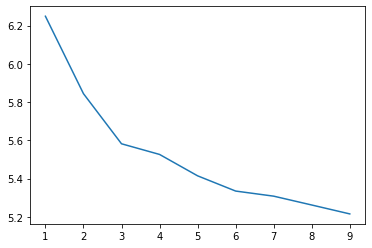

In [6]:
k_all = np.arange(1,10)
plt.plot(k_all,W)
plt.show

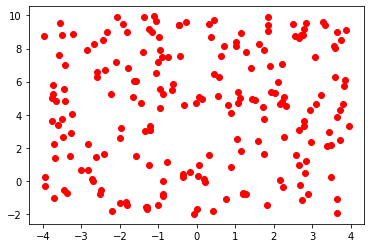

(200,)
(200,)


In [7]:
## Sample 1
x_axis = np.linspace(-4,4,1000)
y_axis = np.linspace(-2,10,1000)
x = np.random.choice(x_axis, 200)
y = np.random.choice(y_axis, 200)
plt.plot(x, y, 'ro')
plt.show()
print(x.shape)
print(y.shape)

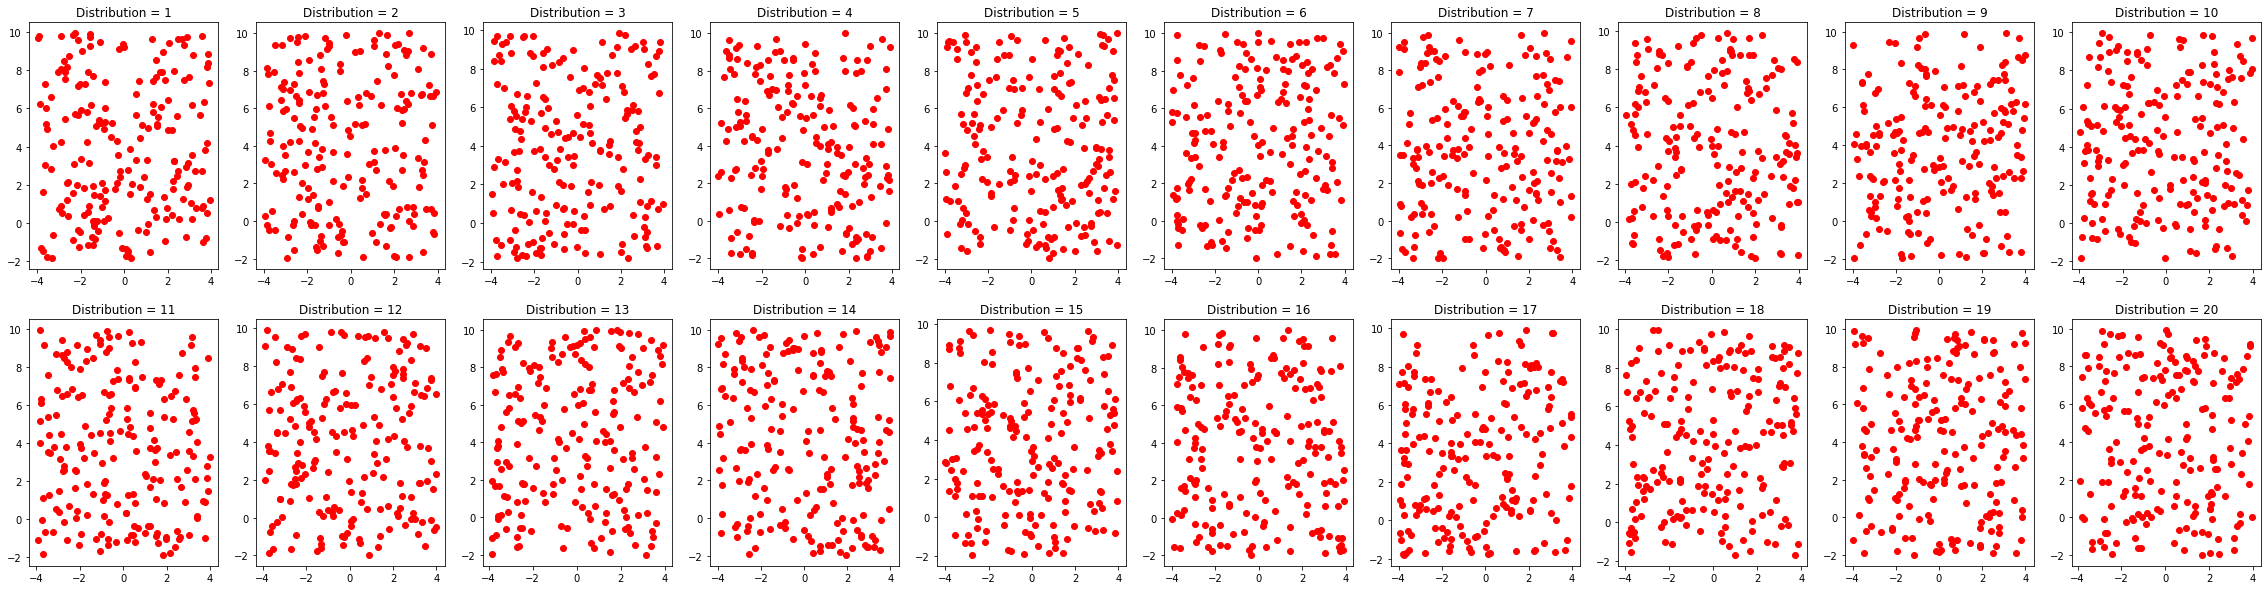

(20, 200, 2)


In [17]:
## Sample 1
# 20 uniform distribution
f = plt.figure()
f.set_figwidth(40)
f.set_figheight(10)
x_axis = np.linspace(-4,4,1000)
y_axis = np.linspace(-2,10,1000)
all_dist = []
for distribution in range(0, 20):
    x = np.random.choice(x_axis, 200)
    y = np.random.choice(y_axis, 200)
    all_dist.append([x,y])
    plt.subplot(2, 10, distribution+1)
    plt.plot(x, y, 'ro')
    plt.title('Distribution = '+str(distribution+1))

plt.show()
all_dist_array = np.array(all_dist) .reshape(20,200,2)
print(all_dist_array.shape)

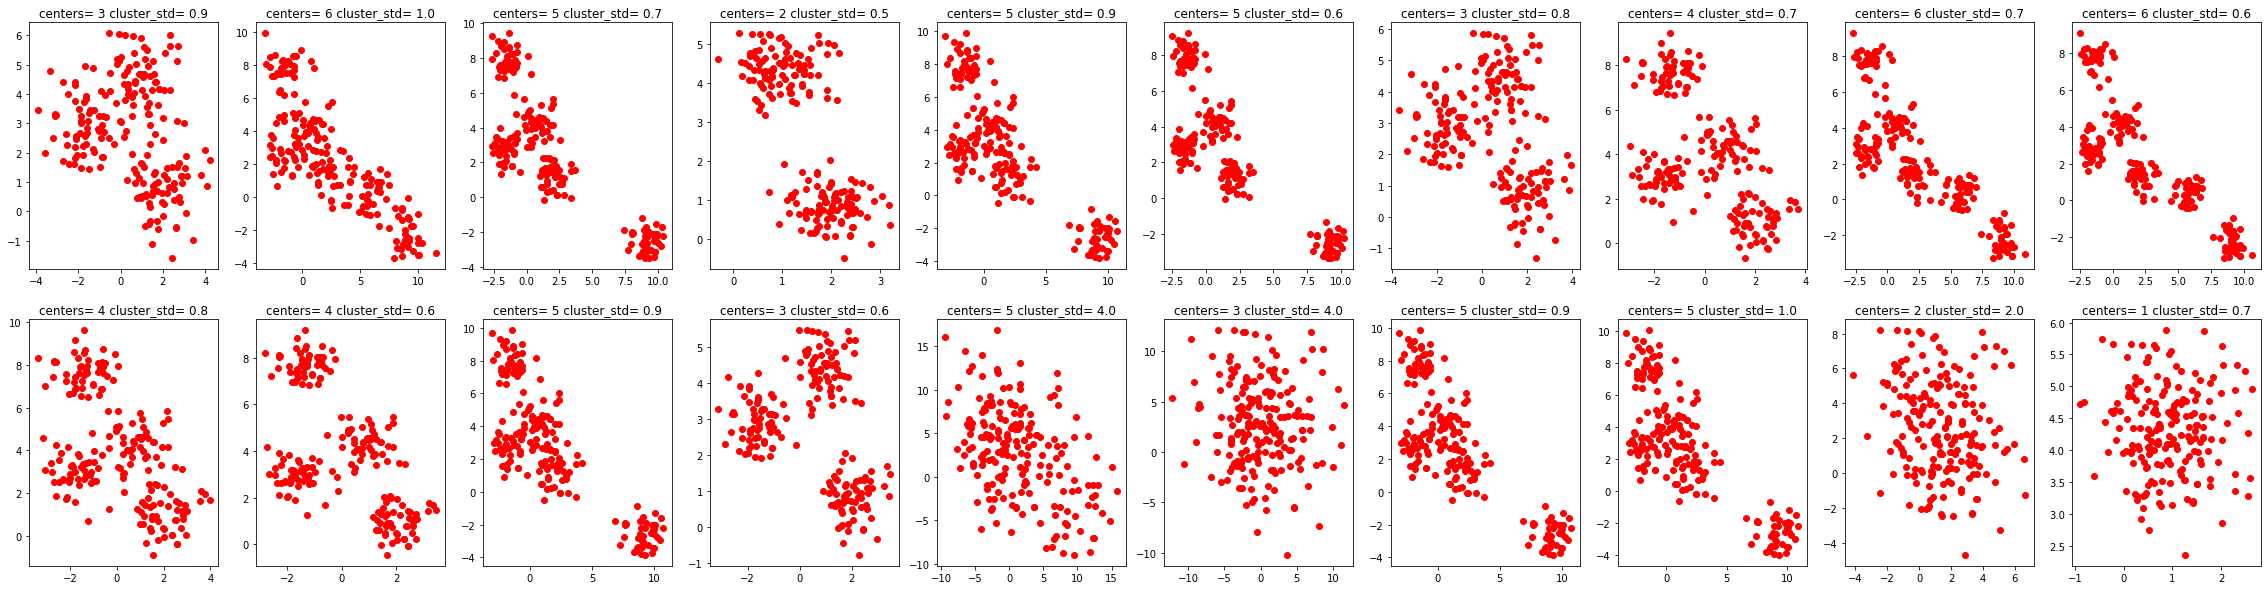

(20, 200, 2)


In [13]:
# Sample 2
f = plt.figure()
f.set_figwidth(40)
f.set_figheight(10)
cluster_std = [0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 4]
centers = [1, 2, 3, 4, 5, 6]
all_dist = []

for distribution in range(0, 20):
    cluster = float(np.random.choice(cluster_std, 1).squeeze())
    center = int(np.random.choice(centers, 1).squeeze())
    X_uniform, y_uniform = make_blobs(n_samples=200, centers=center,
                       cluster_std=cluster, random_state=0)
    all_dist.append(X_uniform)
    plt.subplot(2, 10, distribution+1)
    plt.plot(X_uniform[:,0], X_uniform[:,1],'ro')
    plt.title('centers= '+str(center)+' cluster_std= '+str(cluster))

plt.show()   
all_dist_array = np.array(all_dist)
print(all_dist_array.shape)

In [18]:
import warnings
warnings.simplefilter("ignore")
W_uniform = []
for k in range(1,10):
    d_per_dist = []
    for distribution in range(0,20):
        model = KMeans(n_clusters=k)
        model.fit(all_dist_array[distribution])
        yhat = model.predict(all_dist_array[distribution])
        distance = model.transform(all_dist_array[distribution])
        d = 0
        for j in range(0,200):
            min_distance = np.min(distance[j])
            d = d + min_distance
        d_per_dist.append(d)
    mean_dist = np.mean(d_per_dist)
    W_uniform.append(math.log(mean_dist))
print(W_uniform)

[6.808942461113053, 6.501297201768708, 6.330518799792426, 6.182144962836999, 6.042239168993832, 5.934254482252822, 5.829649095445176, 5.758264231822614, 5.693676527573555]


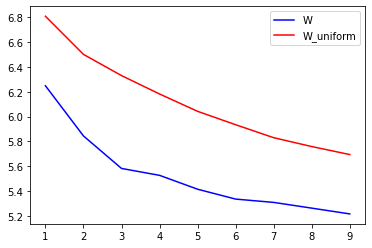

In [19]:
k_all = np.arange(1,10)
plt.plot(k_all, W, "-b", label="W")
plt.plot(k_all, W_uniform, "-r", label="W_uniform")
#plt.show()
plt.legend()

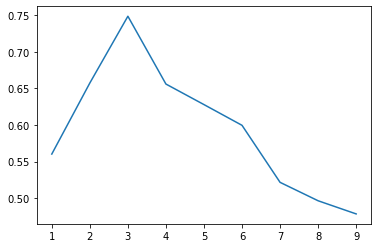

In [20]:
difference = np.array(W_uniform) - np.array(W)
plt.plot(k_all, difference)
plt.show()